<a href="https://colab.research.google.com/github/srohith99/AboutMe/blob/main/LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("/content/PlayTennis.csv")

print("Columns:", data.columns)

target = "PlayTennis"

X = data.drop(target, axis=1)
y = data[target]

# Convert categorical to numbers
X = pd.get_dummies(X)
y = y.map({"Yes": 1, "No": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# ID3 Decision Tree model
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

# 🔥 PRINT DECISION TREE
tree_rules = export_text(model, feature_names=list(X.columns))
print("\nDECISION TREE:\n")
print(tree_rules)


Columns: Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'], dtype='object')
Accuracy: 0.8

DECISION TREE:

|--- Humidity_High <= 0.50
|   |--- Outlook_Rain <= 0.50
|   |   |--- class: 1
|   |--- Outlook_Rain >  0.50
|   |   |--- Wind_Strong <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind_Strong >  0.50
|   |   |   |--- class: 0
|--- Humidity_High >  0.50
|   |--- Wind_Strong <= 0.50
|   |   |--- Outlook_Sunny <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook_Sunny >  0.50
|   |   |   |--- class: 0
|   |--- Wind_Strong >  0.50
|   |   |--- class: 0



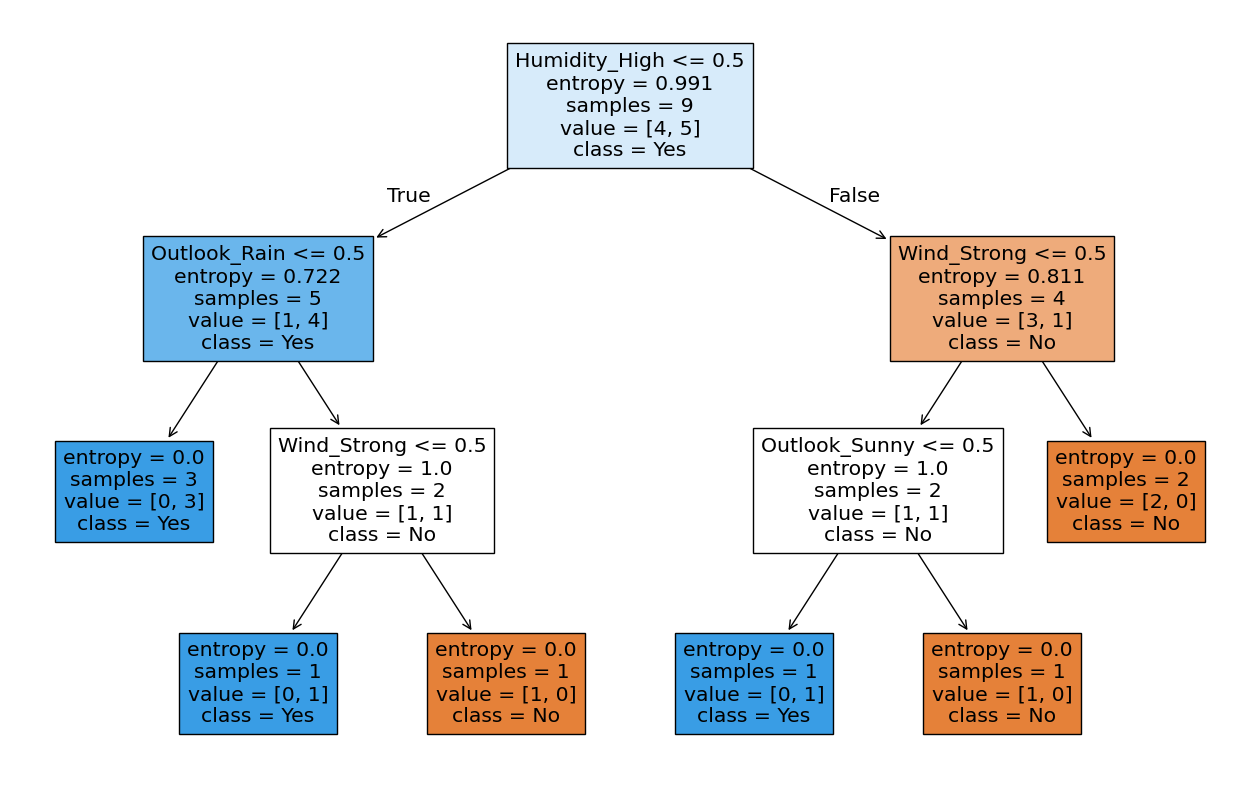

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()
